In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset_name = 'prepared_facebook_data'
folder_name = 'facebook_comm_vol'

path = f"../../other_data_experiments/{folder_name}/"
fourth_test_path = path + "fourth experiment/prepared/"
third_test_path = path + "third experiment/"
GRAPHS_DIR = path + "graphs/"

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
json_file= open(path + "fourth experiment/BO_scores_info.txt", "r") 
scores_info = json.load(json_file)
json_file= open(path + "fourth experiment/BO_iters_info.txt", "r") 
iters_info = json.load(json_file)

In [5]:
#!!!!!!


# wrong values:
scores_info['GRBO'] = {'mean': 0.667556, 'std': 0.0012}
scores_info['BO'] = {'mean': 0.670044, 'std': 0.0012}

# scores_info['RS'] = {'mean': 0.6676, 'std': 0.0018} #from first experiment 
grid_and_default = (0.6648, 0.6362)

In [6]:
max_score = max(max(grid_and_default), scores_info['BO']['mean'], scores_info['BO']['mean'])

In [7]:
iters_labels = list(iters_info.keys())
iters_info = list(iters_info.values())

means_iters = []
std_iters = []

for experiment in iters_info:
    means_iters.append(experiment['mean'])
    std_iters.append(experiment['std'])

In [8]:
scores_labels = list(scores_info.keys())
scores_info = list(scores_info.values())

means_scores = []
std_scores = []


#get mean and confidence interval value for random_search performance on iteration:    
z = 2.262 # 95% student for n = 10
# z = 1.833 # 90% student for n = 10
# if normal or n>=30:
# z = 1.96 # for 95% conf interval (coefficient)
# z = 1.64 # for 90% conf interval
n = 10
for experiment in scores_info:
    means_scores.append(experiment['mean'])
    std_scores.append(experiment['std'])

In [9]:
conf_std = (np.array(std_scores)*z)/np.sqrt(n)
upper_conf = means_scores + conf_std
lower_conf = means_scores - conf_std
confidence = pd.DataFrame([scores_labels, lower_conf, upper_conf]).T
confidence.columns = ["method", "lower_bound", "upper_bound"]

In [10]:
confidence.sort_values("method").set_index("method")

,lower_bound,upper_bound
method,,
BO,0.669186,0.670902
BO_10,0.653483,0.659684
BO_25,0.656968,0.664619
BO_50,0.662559,0.667611
GRBO,0.666698,0.668414
GRBO_10,0.669251,0.671614
GRBO_25,0.670098,0.671854
GRBO_50,0.670271,0.672009


In [11]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

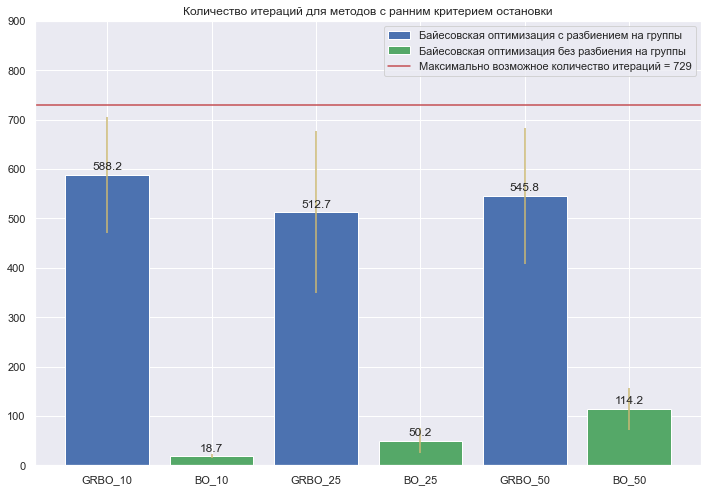

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(range(len(iters_labels)), means_iters,
        yerr=std_iters, align="center", ecolor = 'y', color = ('b','g'))

ax.set_xticks(range(0,len(iters_labels)))
ax.set_xticklabels(iters_labels)

line = ax.axhline(729, color='r', label = 'max_iter_num')
autolabel(rects1)
ax.set_title('Количество итераций для методов с ранним критерием остановки')
plt.legend(handles= (rects1[::2],rects1[1::2],line),
           labels = ('Байесовская оптимизация с разбиением на группы', 
                     'Байесовская оптимизация без разбиения на группы', 
                     'Максимально возможное количество итераций = 729'),
           loc = 'upper right')
ax.set_ylim(0, 900)
fig.tight_layout()
plt.savefig(GRAPHS_DIR+"bayes_iter_comp.jpg")
plt.show()

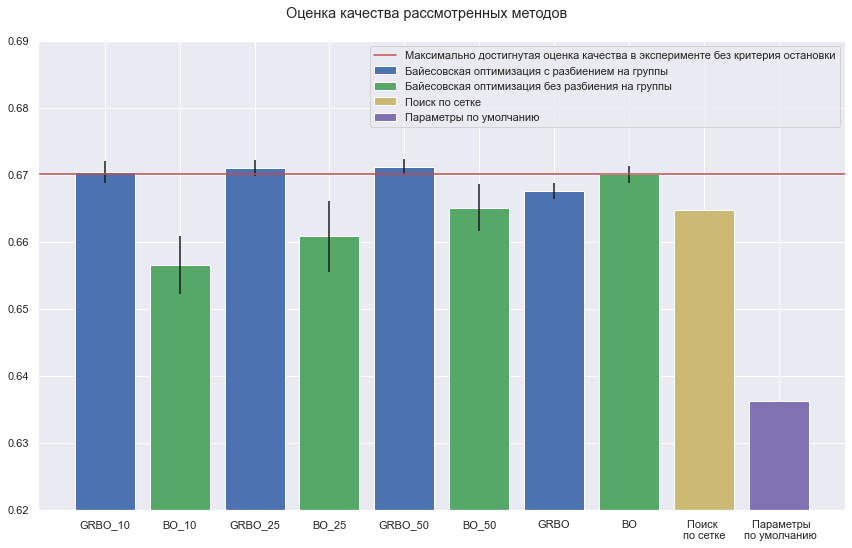

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8))
full_scores_labels = scores_labels.copy()
full_scores_labels.extend(['Поиск \nпо сетке', '  Параметры\n по умолчанию'])


rects3 = axs.bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'k', color = ('b','g'))

rects3_and_half = axs.bar(range(len(scores_labels), 
                                   len(scores_labels)+len(grid_and_default)), 
                             grid_and_default,
                             align="center", color = ('y', 'm'))

axs.set_xticks(range(0,len(full_scores_labels)))
axs.set_xticklabels(full_scores_labels)
line = axs.axhline(max_score, color='r')
axs.set_ylim(0.62, 0.69)

plt.legend(handles= (line, rects3[::2], rects3[1::2], 
                     rects3_and_half[0], rects3_and_half[1]),
           labels = ('Максимально достигнутая оценка качества в эксперименте без критерия остановки', 
                     'Байесовская оптимизация с разбиением на группы', 
                     'Байесовская оптимизация без разбиения на группы', 
                    'Поиск по сетке', 'Параметры по умолчанию'),
           loc = 'best')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.suptitle('Оценка качества рассмотренных методов')
plt.savefig(GRAPHS_DIR+"bayes_scores_comp.jpg")
plt.show()